In [49]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from pandas import pivot_table
import seaborn as sb

In [4]:
origin = load_data('employee_data_40')
origin.head()

[data] https://data.hossam.kr/data/lab06/employee_data_40.xlsx
[desc] 어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터(인덱스, 메타데이터 없음)
[!] Cannot read metadata


,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


# 3.그래프 초기화

In [7]:
my_dpi = 200
fpath ="./NotoSansKr-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()

plt.rcParams['font.family'] = fname
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus'] = False

# histplot + KDE

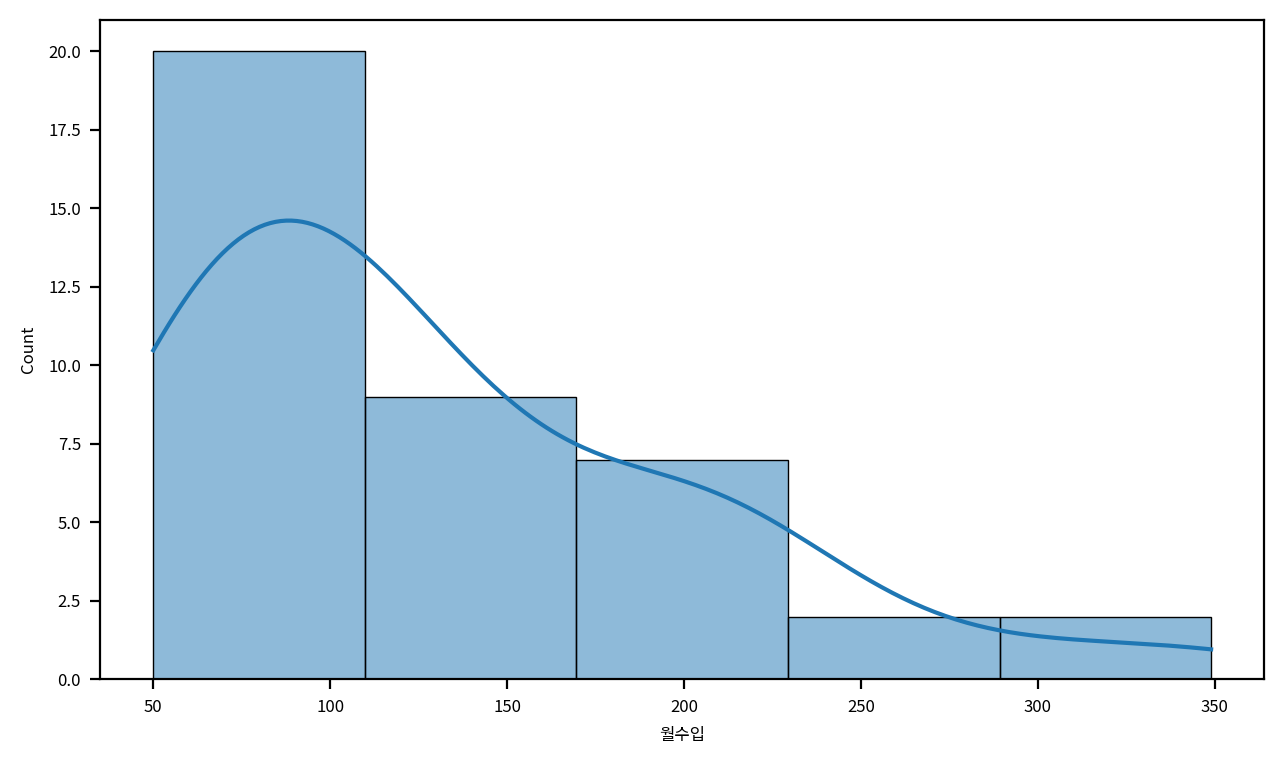

In [ ]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.histplot(data=origin, x="월수입", bins=5,edgecolor="#000000",linewidth=0.5, kde=True)
           


plt.tight_layout() 
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()

# 03.그 밖의 데이터 분포 시각화 방법

###1.바이올린 플롯

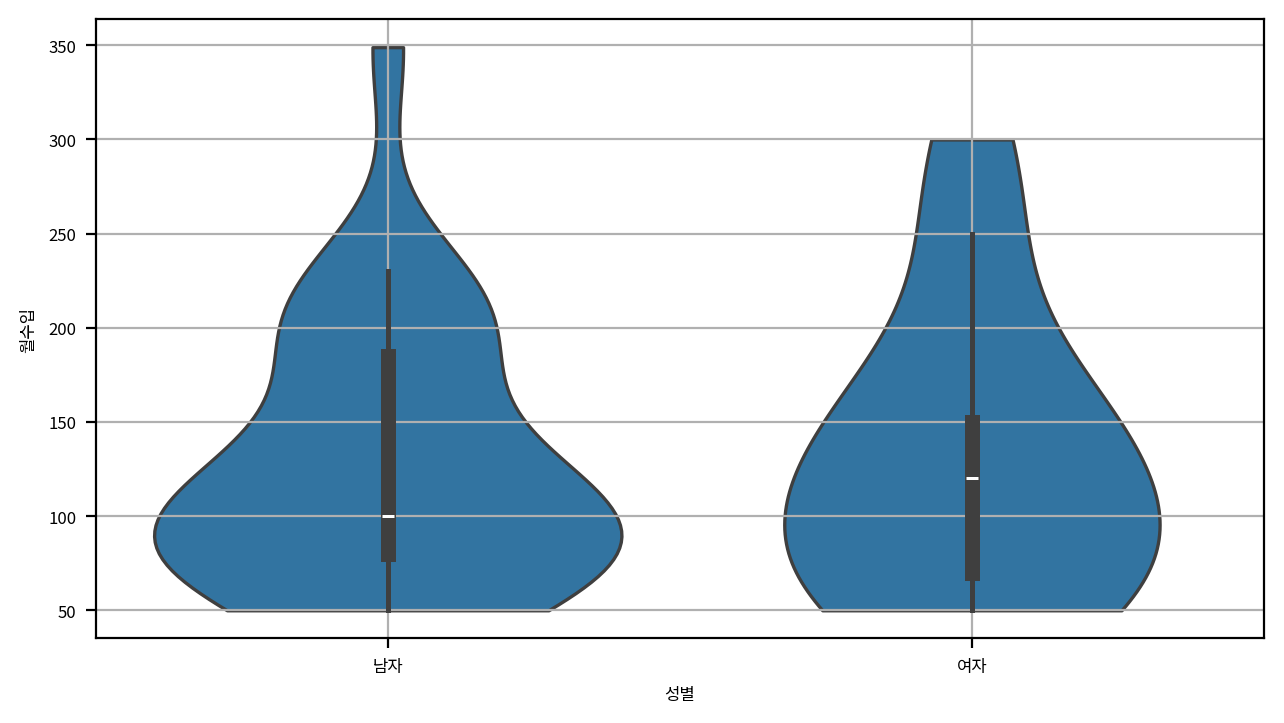

In [27]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.violinplot(data=origin, x='성별', y='월수입',inner='box',cut=0,linewidth=1.2)
           

ax.grid(True)
plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()

###2.strip plot

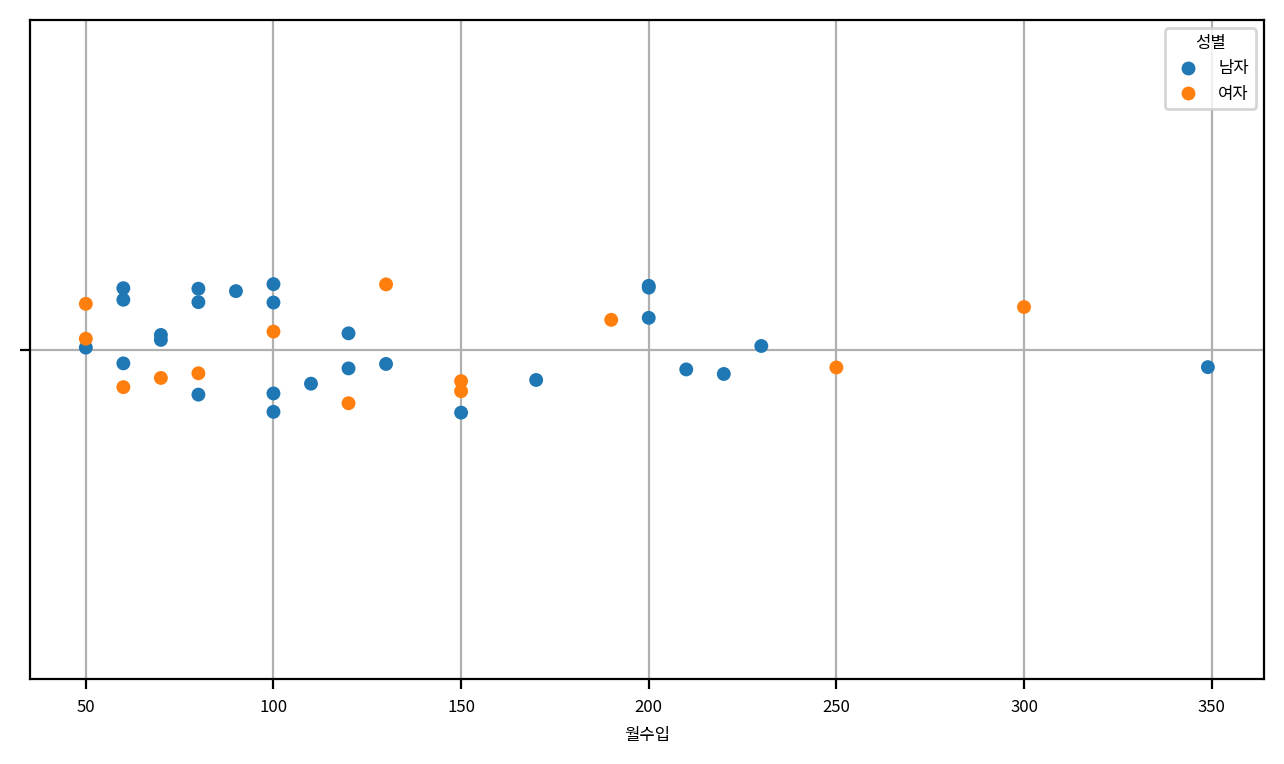

In [28]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.stripplot(data=origin, x='월수입', hue='성별')
           

ax.grid(True)
plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()

###3.Swarm plot

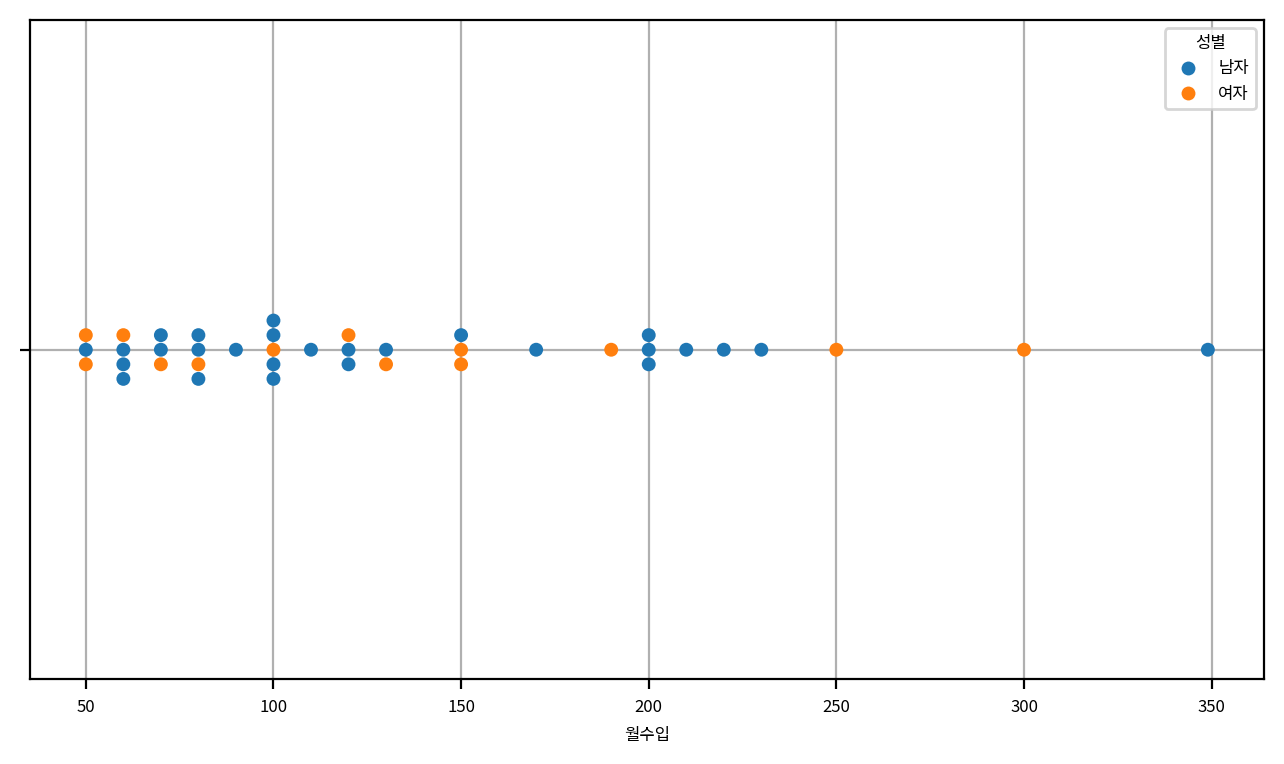

In [29]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.swarmplot(data=origin, x='월수입', hue='성별')
           

ax.grid(True)
plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()

In [35]:
origin = load_data("flights")
origin

[data] https://data.hossam.kr/data/lab06/flights.xlsx
[desc] 어느 항공사의 년/월별 국제선 탑승객 수(출처: seaborn 내장 데이터)

field       description
----------  ----------------------------------
year        항공 승객 수가 집계된 연도
month       항공 승객 수가 집계된 월
passengers  해당 년도/월의 국제선 항공 승객 수



,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


### pivot_table이 전처리에 사용되어야 함

In [40]:
df = pivot_table(data = origin, index = "year", columns= "month", values = "passengers")
df

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129.0,148.0,118.0,118.0,112.0,148.0,135.0,132.0,121.0,104.0,119.0,136.0
1950,135.0,170.0,140.0,126.0,115.0,170.0,149.0,141.0,125.0,114.0,133.0,158.0
1951,163.0,199.0,166.0,150.0,145.0,199.0,178.0,178.0,172.0,146.0,162.0,184.0
1952,181.0,242.0,194.0,180.0,171.0,230.0,218.0,193.0,183.0,172.0,191.0,209.0
1953,235.0,272.0,201.0,196.0,196.0,264.0,243.0,236.0,229.0,180.0,211.0,237.0
1954,227.0,293.0,229.0,188.0,204.0,302.0,264.0,235.0,234.0,203.0,229.0,259.0
1955,269.0,347.0,278.0,233.0,242.0,364.0,315.0,267.0,270.0,237.0,274.0,312.0
1956,313.0,405.0,306.0,277.0,284.0,413.0,374.0,317.0,318.0,271.0,306.0,355.0
1957,348.0,467.0,336.0,301.0,315.0,465.0,422.0,356.0,355.0,305.0,347.0,404.0


In [42]:
df = origin.copy()
df['month']= df['month'].map({
    "January":"1월",
    "Febuary":"2월",
    "March":"3월",
    "April": "4월",
    "May":"5월",
    "June":"6월",
    "July":"7월",
    "August":"8월",
    "September":"9월",
    "October":"10월",
    "November":"11월",
    "December":"12월"
})
df.head()

,year,month,passengers
0,1949,1월,112
1,1949,NaN,118
2,1949,3월,132
3,1949,4월,129
4,1949,5월,121


In [44]:
df2 = pivot_table(df, index = "year", columns = "month", values = "passengers")
df2

month,10월,11월,12월,1월,3월,4월,5월,6월,7월,8월,9월
year,,,,,,,,,,,
1949,119.0,104.0,118.0,112.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0
1950,133.0,114.0,140.0,115.0,141.0,135.0,125.0,149.0,170.0,170.0,158.0
1951,162.0,146.0,166.0,145.0,178.0,163.0,172.0,178.0,199.0,199.0,184.0
1952,191.0,172.0,194.0,171.0,193.0,181.0,183.0,218.0,230.0,242.0,209.0
1953,211.0,180.0,201.0,196.0,236.0,235.0,229.0,243.0,264.0,272.0,237.0
1954,229.0,203.0,229.0,204.0,235.0,227.0,234.0,264.0,302.0,293.0,259.0
1955,274.0,237.0,278.0,242.0,267.0,269.0,270.0,315.0,364.0,347.0,312.0
1956,306.0,271.0,306.0,284.0,317.0,313.0,318.0,374.0,413.0,405.0,355.0
1957,347.0,305.0,336.0,315.0,356.0,348.0,355.0,422.0,465.0,467.0,404.0


# 02.Heatmap 시각화

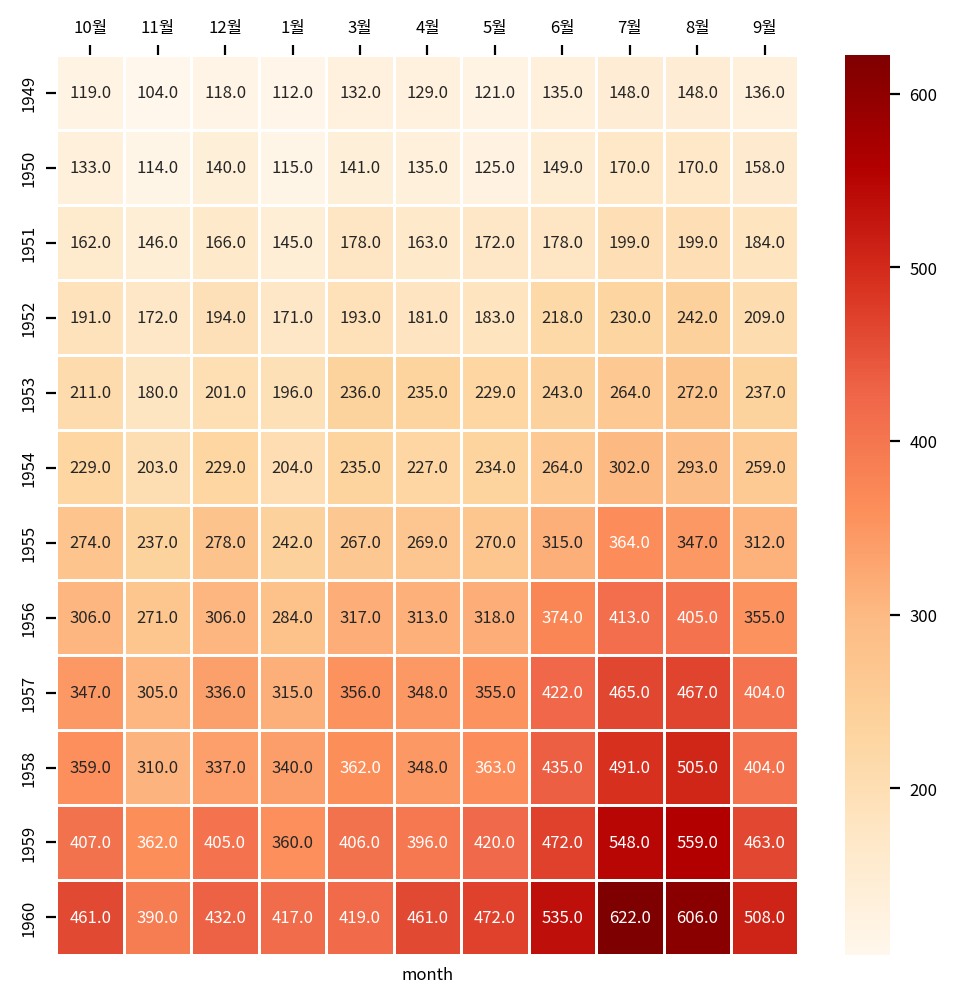

In [62]:
width_px = 1000
height_px = 1000
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.heatmap(data=df2, annot=True, fmt="0.1f", linewidth=0.5,
           cmap="OrRd")
           

ax.set_ylabel("")
ax.set_ylabel("")
ax.xaxis.tick_top()
plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()